In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install xgboost
!pip install keras
!pip install tensorflow --user
!pip install statsmodels
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn.preprocessing import MinMaxScaler


In [53]:
df = pd.read_csv("./data/세계물가지수.csv")
df.rename(columns={"nation":"country"}, inplace=True)
df

,country,year,price_index
0,대한민국,1989.0,41.0
1,대한민국,1990.0,44.6
2,대한민국,1991.0,48.7
3,대한민국,1992.0,51.7
4,대한민국,1993.0,54.2
...,...,...,...
6265,바누아투,2017.0,111.4
6266,바누아투,2018.0,114.0
6267,바누아투,2019.0,117.1
6268,바누아투,2020.0,123.4


In [54]:
year = df[['year']].drop_duplicates().astype(int)
year

,year
0,1989
1,1990
2,1991
3,1992
4,1993
5,1994
6,1995
7,1996
8,1997
9,1998


In [55]:
df2 = pd.read_csv("./data/소비자_물가지수.csv", encoding="euc-kr").dropna()
df2 = df2.transpose().reset_index(drop=True)
df2 = df2.rename(columns=df2.iloc[0])
df2 = df2.iloc[1:]
df2 = df2.rename(columns={"국가별": 'year'})
df2['year'] = df2['year'].astype(int)
df2 = df2.set_index(keys="year")
df2

,대한민국,아프가니스탄,아르메니아,아제르바이잔,바레인,방글라데시,부탄,브루나이,캄보디아,중국,...,미크로네시아,나우루,뉴질랜드,팔라우,파푸아뉴기니,사모아,솔로몬제도,통가,투발루,바누아투
year,,,,,,,,,,,,,,,,,,,,,
1989,41.0,-,-,-,77.7,30.4,30.4,76.4,-,39.2,...,-,-,61.0,-,20.0,36.1,15.0,29.2,-,53.3
1990,44.6,-,-,-,78.5,32.2,33.4,78.0,-,40.4,...,-,-,64.7,-,21.4,41.6,16.3,32.0,-,55.9
1991,48.7,-,-,0.0,79.1,34.3,37.5,79.3,-,41.9,...,-,-,66.4,-,22.9,40.8,18.8,35.4,-,59.5
1992,51.7,-,-,0.0,78.9,35.5,43.5,80.3,-,44.5,...,-,-,67.0,-,23.9,44.5,20.8,38.2,-,61.9
1993,54.2,-,0.5,0.5,80.9,36.6,48.4,83.7,-,51.0,...,-,-,67.9,-,25.0,45.3,22.7,38.6,-,64.1
1994,57.6,-,16.0,8.3,81.6,38.6,51.7,85.8,44.9,63.4,...,-,-,69.1,-,25.8,50.7,25.7,39.0,-,65.6
1995,60.2,-,44.3,42.6,83.8,42.5,56.7,90.9,44.5,74.1,...,-,-,71.7,-,30.2,49.3,28.2,39.5,-,67.0
1996,63.2,-,52.6,51.0,83.4,43.5,61.6,92.7,47.7,80.2,...,-,-,73.3,-,33.7,51.9,31.5,40.7,-,67.7
1997,66.0,-,59.9,52.9,85.4,45.9,65.7,94.3,51.5,82.5,...,-,-,74.2,-,35.1,55.5,34.1,41.6,-,69.6


In [56]:
df2 = df2[df2.loc[:, :] != '-']
df2 = df2.astype(float)
df2 = df2.fillna(0)
price_index_table = df2

In [57]:
years = list(price_index_table.index)

for i in range(len(years)):
    years[i] = datetime.datetime.strptime(str(years[i])+"/01/01", "%Y/%m/%d")

print(type(years[0].date()))

price_index_table.index = years

<class 'datetime.date'>


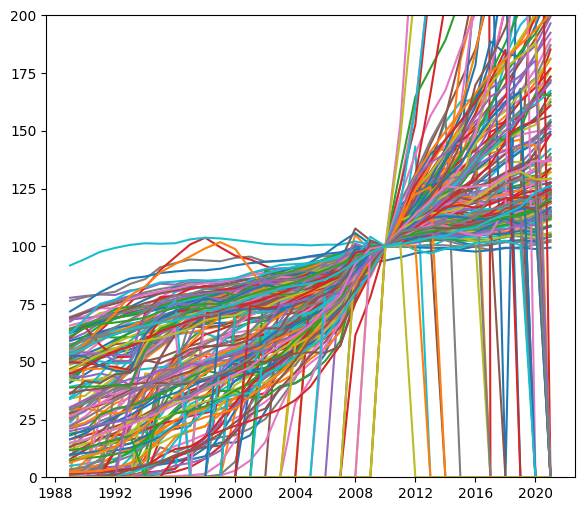

In [58]:
order = price_index_table.columns[0:]

plt.rcParams["figure.figsize"] = (15, 6)

for i in order:
    x = price_index_table.index
    plt.subplot(1,2,1)
    plt.plot(x, price_index_table[i], label=i)

plt.ylim([0, 200])
plt.show()

In [59]:
country = '이스라엘'

original_country = price_index_table[country].values
dates = pd.to_datetime(price_index_table.index)

In [60]:
dates

DatetimeIndex(['1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
               '2021-01-01'],
              dtype='datetime64[ns]', freq=None)

In [61]:

cols = list(price_index_table[country])
cols

[27.7,
 32.5,
 38.7,
 43.4,
 48.1,
 54.0,
 59.4,
 66.2,
 72.1,
 76.1,
 80.0,
 80.8,
 81.8,
 86.5,
 87.1,
 86.7,
 87.9,
 89.7,
 90.1,
 94.2,
 97.4,
 100.0,
 103.5,
 105.2,
 106.9,
 107.4,
 106.7,
 106.1,
 106.4,
 107.3,
 108.2,
 107.5,
 109.1]

In [62]:
scaler = StandardScaler()
scaler = scaler.fit(price_index_table)
price_data_scaled = scaler.transform(price_index_table)

In [63]:
n_train = int(0.9*price_data_scaled.shape[0])
train_data_scaled = price_data_scaled[0:n_train]
train_dates = dates[0:n_train]

test_data_scaled = price_data_scaled[n_train:]
test_dates = dates[n_train:]

In [64]:
time_steps = 3;
for_periods = 1;

# create training and test set 
ts_train = price_index_table[:'2018-01-01'].iloc[:, 0:1].values
ts_test = price_index_table['2019-01-01':].iloc[:, 0:1].values
ts_train_len = len(ts_train)
ts_test_len = len(ts_test)

scaler = MinMaxScaler(feature_range=(0,1))
ts_train_scaled = scaler.fit_transform(ts_train)

# create training data of s samples and t time steps 
X_train = [] 
y_train = [] 
y_train_stacked = [] 
for i in range(time_steps, ts_train_len - 1):
    X_train.append(ts_train_scaled[i-time_steps:i,0])
    y_train.append(ts_train_scaled[i:i+for_periods,0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshapng X_train for efficient modelling 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

# Preparing to creat X_test 
inputs = pd.concat((price_index_table[country][:'2018-01-01'], price_index_table[country]['2019-01-01':]), axis=0).values
inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(time_steps, ts_test_len+ time_steps- for_periods+1):
    X_test.append(inputs[i-time_steps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

X_train.shape[0], X_train.shape[1]


(26, 3)

In [65]:
# Convert the 3D shape of X_train to a data frame so we can see: 
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0], X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see, y_train_see], axis = 1)

# Convert the 3D shape of X_test to a data frame so we can see: 
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0], X_test.shape[1])))
pd.DataFrame(X_test_see)

print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")

There are 26 samples in the training data
There are 3 samples in the test data


In [66]:
# create a model 
from keras.models import Sequential 
from keras.layers import Dense, SimpleRNN 

my_rnn_model = Sequential()
my_rnn_model.add(SimpleRNN(32, return_sequences = True))
my_rnn_model.add(SimpleRNN(32))
my_rnn_model.add(Dense(1)) # The time step of the output 

my_rnn_model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# fit the RNN model 
my_rnn_model.fit(X_train,y_train, epochs = 100, batch_size = 150, verbose = 0) 

# Finalizing predictions 
rnn_predictions = my_rnn_model.predict(X_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions)

1/1 [==============================] - 0s 135ms/step


(101.19547, <Axes: >)

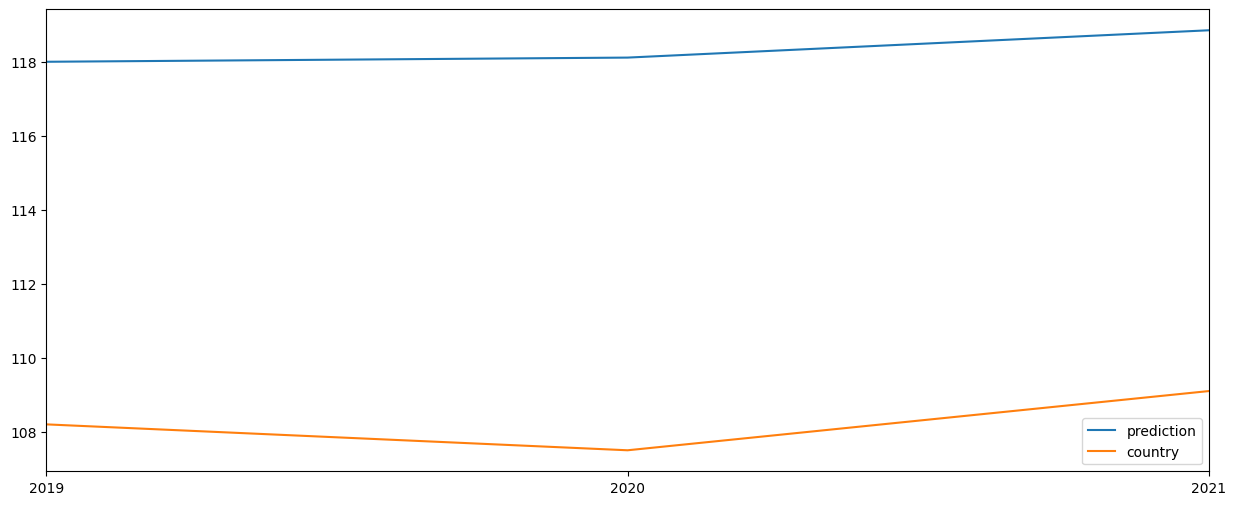

In [67]:
actual_pred = pd.DataFrame(columns = ['prediction'])
actual_pred['country'] = price_index_table.loc['2019-01-01':,country][0:len(rnn_predictions)]
actual_pred['prediction'] = rnn_predictions[:,:]

from keras.metrics import MeanSquaredError 
m = MeanSquaredError()
m.update_state(np.array(actual_pred['country']), np.array(actual_pred['prediction']))

m.result().numpy(), actual_pred.plot()

In [68]:
actual_pred

,prediction,country
2019-01-01,117.997185,108.2
2020-01-01,118.110146,107.5
2021-01-01,118.848145,109.1


In [69]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, GRU, LSTM
from keras.optimizers import SGD

# The LSTM architecture
my_LSTM_model = Sequential()
my_LSTM_model.add(LSTM(units = 50, 
                        return_sequences = True, 
                        input_shape = (X_train.shape[1],1), 
                        activation = 'relu'))
my_LSTM_model.add(LSTM(units = 50, activation = 'relu'))
my_LSTM_model.add(Dense(units=1))

# Compiling 
my_LSTM_model.compile(optimizer = SGD(learning_rate = 0.01,
                                        momentum = 0.9, nesterov = False),
                        loss = 'mean_squared_error')

# Fitting to the training set 
my_LSTM_model.fit(X_train, y_train, epochs = 50, batch_size = 150, verbose = 0)

LSTM_prediction = my_LSTM_model.predict(X_test)
LSTM_prediction = scaler.inverse_transform(LSTM_prediction)

my_LSTM_model, LSTM_prediction

1/1 [==============================] - 0s 164ms/step


(<keras.src.engine.sequential.Sequential at 0x20fc645a550>,
 array([[84.87825],
        [84.90687],
        [84.92748]], dtype=float32))

(546.2214, <Axes: >)

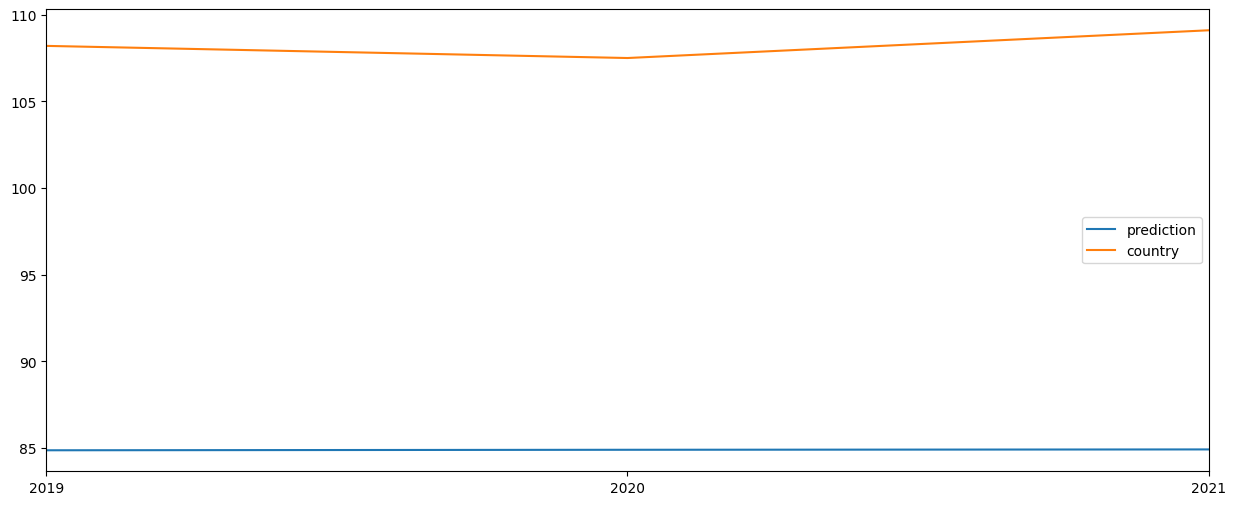

In [70]:
actual_pred = pd.DataFrame(columns = ['prediction'])
actual_pred['country'] = price_index_table.loc['2019-01-01':,country][0:len(rnn_predictions)]
actual_pred['prediction'] = LSTM_prediction[:,:]

from keras.metrics import MeanSquaredError 
m = MeanSquaredError()
m.update_state(np.array(actual_pred['country']), np.array(actual_pred['prediction']))

m.result().numpy(), actual_pred.plot()

In [71]:
# create a model 
from keras.models import Sequential 
from keras.layers import Dense, SimpleRNN, GRU, Dropout 
from keras.optimizers import SGD 

# The GRU architecture 
my_GRU_model = Sequential()
my_GRU_model.add(GRU(units = 50, 
                        return_sequences = True, 
                        input_shape = (X_train.shape[1],1), 
                        activation = 'tanh'))
my_GRU_model.add(GRU(units = 50, 
                        activation = 'tanh'))
my_GRU_model.add(Dropout(0.2))
my_GRU_model.add(Dense(units = 1))

# Compiling the RNN 
my_GRU_model.compile(optimizer = SGD(lr = 0.01,
                                        momentum = 0.9, nesterov = False), 
                        loss = 'mean_squared_error')

# Fitting to the trainig set 
my_GRU_model.fit(X_train, y_train, epochs = 50, batch_size = 150, verbose = 0)

GRU_prediction = my_GRU_model.predict(X_test)
GRU_prediction = scaler.inverse_transform(GRU_prediction)

my_GRU_model, GRU_prediction

1/1 [==============================] - 0s 398ms/step


(<keras.src.engine.sequential.Sequential at 0x20fc86fe090>,
 array([[96.298676],
        [96.64799 ],
        [96.8039  ]], dtype=float32))

(546.2214, <Axes: >)

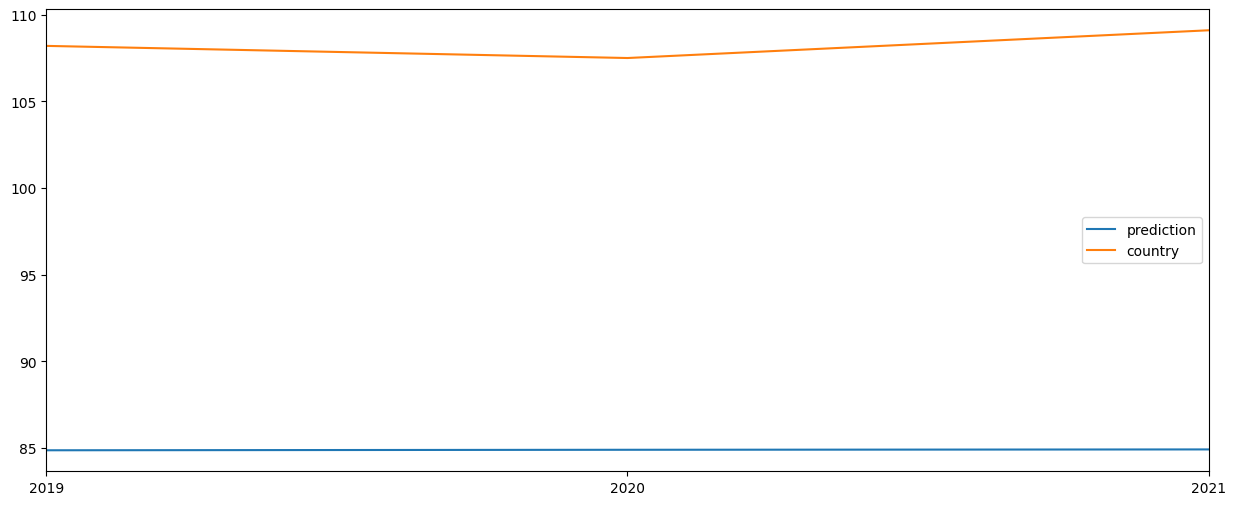

In [72]:
actual_pred = pd.DataFrame(columns = ['prediction'])
actual_pred['country'] = price_index_table.loc['2019-01-01':,country][0:len(rnn_predictions)]
actual_pred['prediction'] = LSTM_prediction[:,:]

from keras.metrics import MeanSquaredError 
m = MeanSquaredError()
m.update_state(np.array(actual_pred['country']), np.array(actual_pred['prediction']))

m.result().numpy(), actual_pred.plot()

In [73]:
price_index_table['date'] = price_index_table.index
price_index_table

,대한민국,아프가니스탄,아르메니아,아제르바이잔,바레인,방글라데시,부탄,브루나이,캄보디아,중국,...,나우루,뉴질랜드,팔라우,파푸아뉴기니,사모아,솔로몬제도,통가,투발루,바누아투,date
1989-01-01,41.0,0.0,0.0,0.0,77.7,30.4,30.4,76.4,0.0,39.2,...,0.0,61.0,0.0,20.0,36.1,15.0,29.2,0.0,53.3,1989-01-01
1990-01-01,44.6,0.0,0.0,0.0,78.5,32.2,33.4,78.0,0.0,40.4,...,0.0,64.7,0.0,21.4,41.6,16.3,32.0,0.0,55.9,1990-01-01
1991-01-01,48.7,0.0,0.0,0.0,79.1,34.3,37.5,79.3,0.0,41.9,...,0.0,66.4,0.0,22.9,40.8,18.8,35.4,0.0,59.5,1991-01-01
1992-01-01,51.7,0.0,0.0,0.0,78.9,35.5,43.5,80.3,0.0,44.5,...,0.0,67.0,0.0,23.9,44.5,20.8,38.2,0.0,61.9,1992-01-01
1993-01-01,54.2,0.0,0.5,0.5,80.9,36.6,48.4,83.7,0.0,51.0,...,0.0,67.9,0.0,25.0,45.3,22.7,38.6,0.0,64.1,1993-01-01
1994-01-01,57.6,0.0,16.0,8.3,81.6,38.6,51.7,85.8,44.9,63.4,...,0.0,69.1,0.0,25.8,50.7,25.7,39.0,0.0,65.6,1994-01-01
1995-01-01,60.2,0.0,44.3,42.6,83.8,42.5,56.7,90.9,44.5,74.1,...,0.0,71.7,0.0,30.2,49.3,28.2,39.5,0.0,67.0,1995-01-01
1996-01-01,63.2,0.0,52.6,51.0,83.4,43.5,61.6,92.7,47.7,80.2,...,0.0,73.3,0.0,33.7,51.9,31.5,40.7,0.0,67.7,1996-01-01
1997-01-01,66.0,0.0,59.9,52.9,85.4,45.9,65.7,94.3,51.5,82.5,...,0.0,74.2,0.0,35.1,55.5,34.1,41.6,0.0,69.6,1997-01-01
1998-01-01,70.9,0.0,65.1,52.5,85.1,49.7,72.6,93.9,59.1,81.8,...,0.0,75.1,0.0,39.8,56.7,38.3,42.9,0.0,71.9,1998-01-01


In [74]:
country_list = list(price_index_table)[:-1]

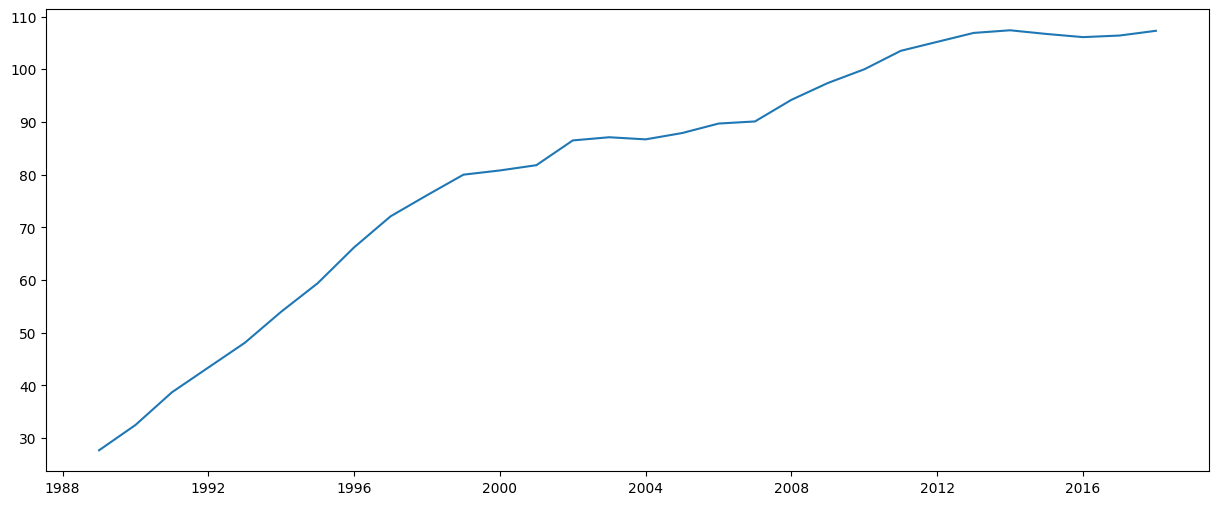

In [75]:
train = price_index_table[:-3]
test = price_index_table[-3:]

plt.plot(train['date'], train[country])
plt.show()

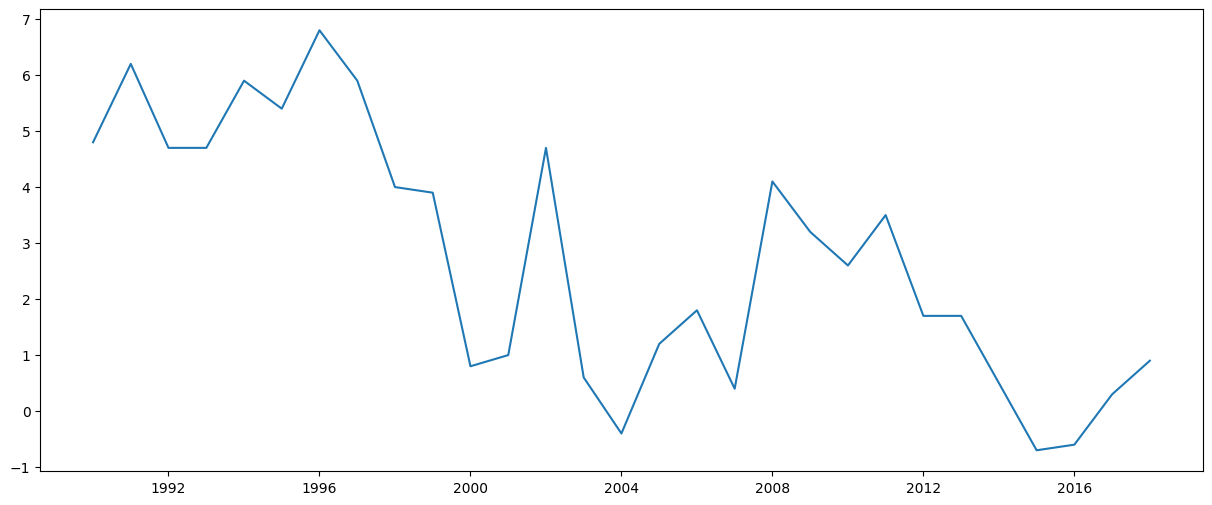

In [76]:
diff_1 = train[country].diff().dropna()
plt.plot(diff_1)
plt.show()

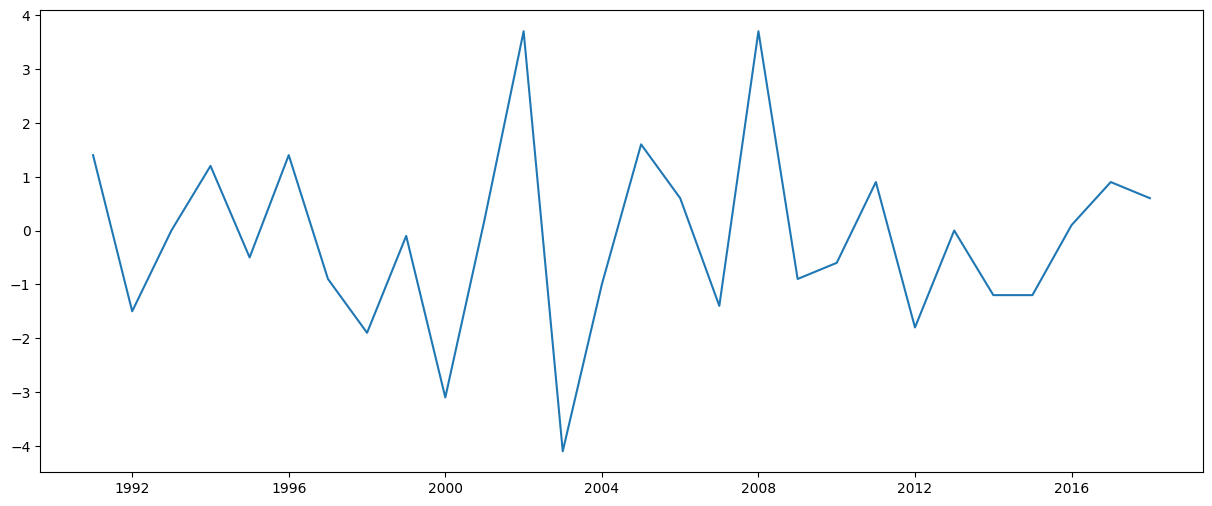

In [77]:
diff_2 = diff_1.diff().dropna()
plt.plot(diff_2)
plt.show()

In [78]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [79]:
index_5_years = pd.date_range(test.index[-1], freq='YS', periods=5, tz=None)
index_5_years

DatetimeIndex(['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01',
               '2025-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [80]:
nyc = train[['date', country]]
nyc_v = test[['date', country]]

print('train shape', train)
print('test shape', test.shape)

train shape              대한민국  아프가니스탄  아르메니아  아제르바이잔    바레인  방글라데시     부탄   브루나이   캄보디아  \
1989-01-01   41.0     0.0    0.0     0.0   77.7   30.4   30.4   76.4    0.0   
1990-01-01   44.6     0.0    0.0     0.0   78.5   32.2   33.4   78.0    0.0   
1991-01-01   48.7     0.0    0.0     0.0   79.1   34.3   37.5   79.3    0.0   
1992-01-01   51.7     0.0    0.0     0.0   78.9   35.5   43.5   80.3    0.0   
1993-01-01   54.2     0.0    0.5     0.5   80.9   36.6   48.4   83.7    0.0   
1994-01-01   57.6     0.0   16.0     8.3   81.6   38.6   51.7   85.8   44.9   
1995-01-01   60.2     0.0   44.3    42.6   83.8   42.5   56.7   90.9   44.5   
1996-01-01   63.2     0.0   52.6    51.0   83.4   43.5   61.6   92.7   47.7   
1997-01-01   66.0     0.0   59.9    52.9   85.4   45.9   65.7   94.3   51.5   
1998-01-01   70.9     0.0   65.1    52.5   85.1   49.7   72.6   93.9   59.1   
1999-01-01   71.5     0.0   65.5    48.0   84.0   52.7   77.5   93.5   61.5   
2000-01-01   73.1     0.0   65.0    48.9

In [81]:
nyc.set_index('date', inplace=True)
nyc_v.set_index('date', inplace=True)

In [82]:
model_arima = ARIMA(nyc, order=(2,1,2))
model_arima_fit = model_arima.fit()

c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [88]:
fcast1 = model_arima_fit.forecast(7)
print(fcast1)
fcast1 = pd.Series(fcast1, index=index_5_years)
fcast1 = fcast1.rename("Arima")

fcast1

2019-01-01    107.848381
2020-01-01    108.290922
2021-01-01    108.766228
2022-01-01    109.197784
2023-01-01    109.629238
2024-01-01    110.037066
2025-01-01    110.435246
Freq: AS-JAN, Name: predicted_mean, dtype: float64


2021-01-01    108.766228
2022-01-01    109.197784
2023-01-01    109.629238
2024-01-01    110.037066
2025-01-01    110.435246
Freq: AS-JAN, Name: Arima, dtype: float64

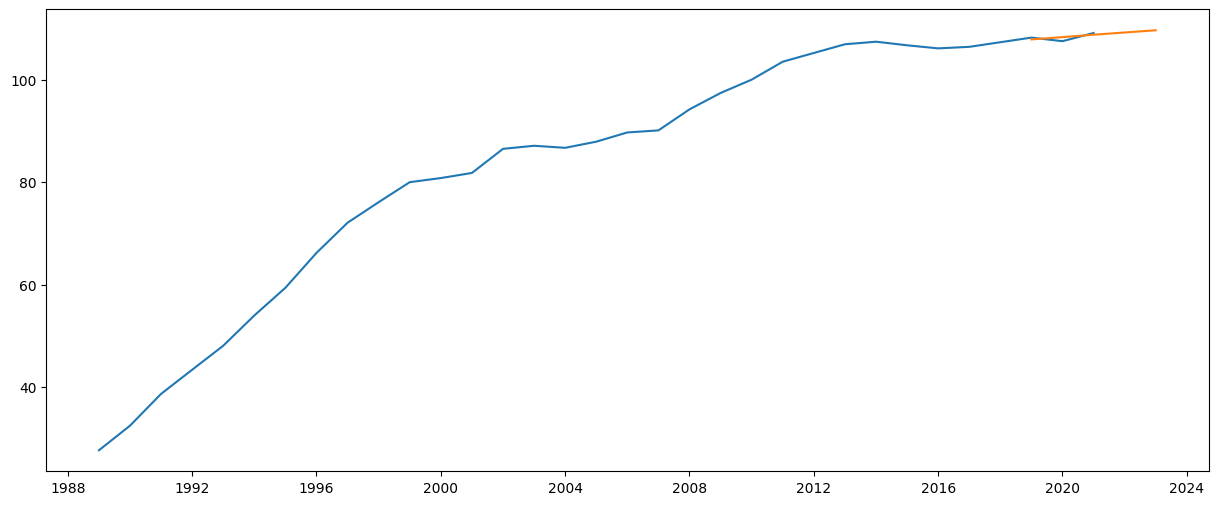

In [84]:
original_data = price_index_table[[country]]
predicted_data = model_arima_fit.forecast(5)
plt.plot(original_data)
plt.plot(predicted_data)
plt.show()

c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\SSAFY\AppData\Local\Programs\Py

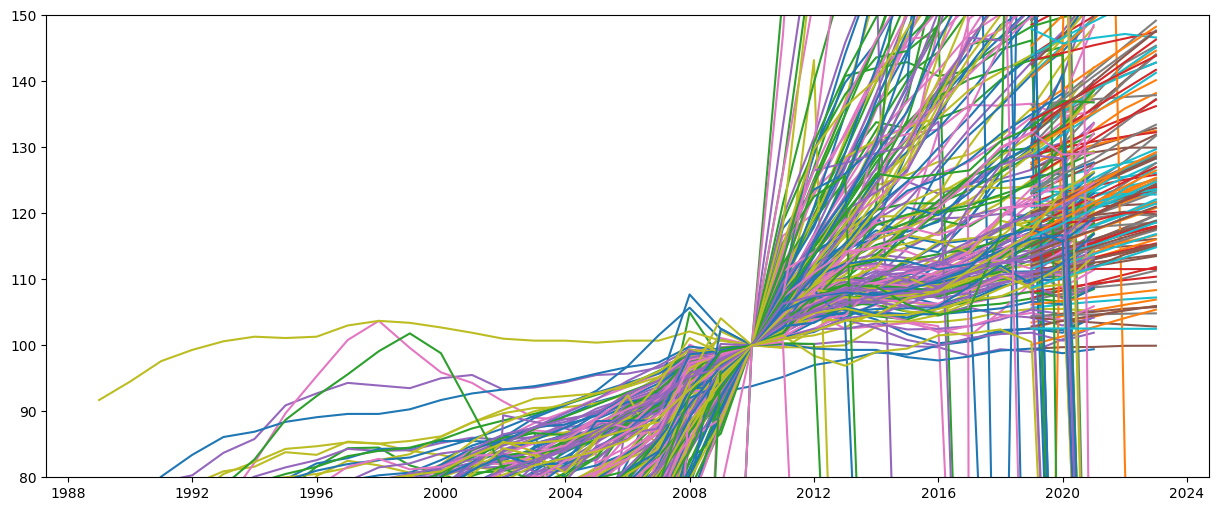

In [94]:
for c in country_list:
    train = price_index_table[:-3]
    test = price_index_table[-3:]

    nyc = train[['date', c]]
    nyc_v = test[['date', c]]
    nyc.set_index('date', inplace=True)
    nyc_v.set_index('date', inplace=True)

    model_arima = ARIMA(nyc, order=(2,1,2))
    model_arima_fit = model_arima.fit()

    fcast1 = model_arima_fit.forecast(7)
    fcast1 = pd.Series(fcast1, index=index_5_years)
    fcast1 = fcast1.rename("Arima")

    original_data = price_index_table[[c]]
    predicted_data = model_arima_fit.forecast(5)
    plt.plot(original_data)
    plt.plot(predicted_data)

plt.ylim([80, 150])
plt.show()

### Auto ARIMA

In [137]:
!pip install --upgrade pmdarima

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df0 = pd.read_csv('./data/국가별_물가지수_금융지표.csv', index_col=0, parse_dates=True)
df0

,대한민국,아프가니스탄,아르메니아,아제르바이잔,바레인,방글라데시,부탄,브루나이,캄보디아,중국,...,s&p500,nifty,nasdaq,kospi,hangseng,ftse,dowjones,dax,aust_s&p,nikkei
year,,,,,,,,,,,,,,,,,,,,,
2001-01-01,76.1,0.0,67.0,49.6,82.4,55.0,83.4,95.5,60.6,81.6,...,1194.178226,1121.550000,1750.088185,572.834472,12547.856967,5558.076494,10208.861653,5614.754664,3301.383399,12093.274713
2002-01-01,78.2,0.0,67.8,51.0,82.0,56.8,85.4,93.3,60.8,81.0,...,993.937302,1056.021514,1167.196905,756.978033,10453.831417,4588.637302,9214.852659,4178.810000,3222.100000,10123.135488
2003-01-01,80.9,0.0,71.0,52.1,83.3,60.0,86.8,93.6,61.3,81.9,...,965.225794,1233.705118,1220.370397,679.830000,10291.055363,4049.861265,9006.636667,3191.468024,3072.250593,9311.418980
2004-01-01,83.8,63.5,75.9,55.6,85.3,64.6,71.1,94.4,64.0,85.0,...,1130.647619,1755.868898,1465.350992,832.916305,12918.464297,4521.299606,10315.512778,3981.025992,3549.116078,11179.252561
2005-01-01,86.2,71.6,76.4,61.0,87.5,69.2,74.8,95.5,68.2,86.5,...,1207.228968,2268.910558,1555.705873,1073.577590,14352.592551,5160.640873,10546.655556,4677.842335,4315.129365,12422.576571
2006-01-01,88.1,76.4,78.6,66.1,89.3,73.8,78.6,95.7,72.2,87.9,...,1310.461633,3357.093800,1655.763546,1352.218259,16885.419320,5920.315476,11409.779721,5887.437451,5116.224206,16110.486129
2007-01-01,90.3,83.1,82.1,77.1,92.2,80.6,82.6,96.6,78.5,92.2,...,1477.184542,4571.292369,1943.489920,1712.457886,23196.370870,6403.460474,13178.252550,7463.186071,6212.345850,16996.327551
2008-01-01,94.5,105.0,89.4,93.2,95.4,87.7,89.5,98.6,97.4,97.6,...,1220.042055,4339.113211,1698.948735,1529.494194,20889.575754,5361.032411,11244.049091,6204.161484,4989.370472,12144.710861
2009-01-01,97.1,97.9,92.4,94.6,98.1,92.5,93.4,99.6,96.2,96.9,...,948.046389,4113.960082,1494.792579,1429.038261,18106.037549,4568.413834,8885.655198,5015.023633,4087.263780,9346.109918


In [140]:
country = '대한민국'

country_a = df0[[country]]
country_a

,대한민국
year,
2001-01-01,76.1
2002-01-01,78.2
2003-01-01,80.9
2004-01-01,83.8
2005-01-01,86.2
2006-01-01,88.1
2007-01-01,90.3
2008-01-01,94.5
2009-01-01,97.1


In [141]:
train = country_a[country][:int(0.8*len(country_a))]
test = country_a[country][int(0.8*len(country_a)):]

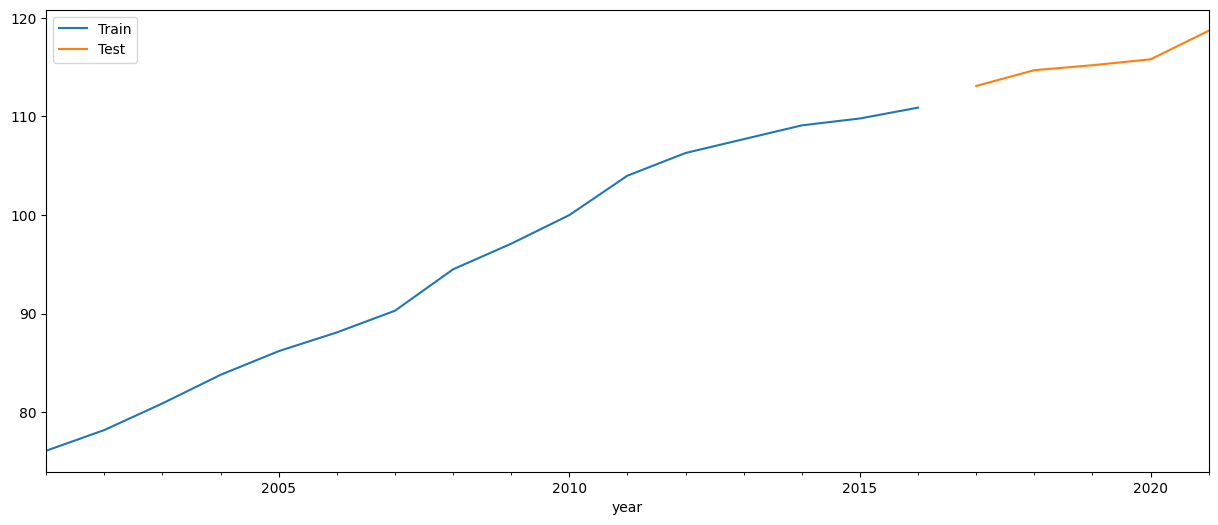

In [142]:
train.plot(label='Train')
test.plot(label='Test')
plt.legend()
plt.show()

In [143]:
import pmdarima as pm

kpss_diffs = pm.arima.ndiffs(train, alpha=0.05, test='kpss', max_d=5)
adf_diffs = pm.arima.ndiffs(train, alpha=0.05, test='adf', max_d=5)
n_diffs = max(kpss_diffs, adf_diffs)

print(f"Optimized 'd' = {n_diffs}")

Optimized 'd' = 5


In [144]:
model = pm.auto_arima(train, d=n_diffs, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,5,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,5,0)(0,0,0)[0]             : AIC=68.996, Time=0.01 sec
 ARIMA(1,5,0)(0,0,0)[0]             : AIC=66.616, Time=0.01 sec
 ARIMA(0,5,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,5,0)(0,0,0)[0]             : AIC=58.725, Time=0.01 sec
 ARIMA(3,5,0)(0,0,0)[0]             : AIC=56.096, Time=0.03 sec
 ARIMA(4,5,0)(0,0,0)[0]             : AIC=53.924, Time=0.03 sec
 ARIMA(5,5,0)(0,0,0)[0]             : AIC=54.351, Time=0.10 sec
 ARIMA(4,5,1)(0,0,0)[0]             : AIC=55.486, Time=0.06 sec
 ARIMA(3,5,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(5,5,1)(0,0,0)[0]             : AIC=52.836, Time=0.15 sec
 ARIMA(5,5,2)(0,0,0)[0]             : AIC=16.000, Time=0.13 sec


c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,5,2)(0,0,0)[0]             : AIC=14.000, Time=0.10 sec
 ARIMA(3,5,2)(0,0,0)[0]             : AIC=12.000, Time=0.09 sec
 ARIMA(3,5,3)(0,0,0)[0]             : AIC=58.800, Time=0.12 sec
 ARIMA(2,5,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,5,3)(0,0,0)[0]             : AIC=56.832, Time=0.10 sec
 ARIMA(4,5,3)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,5,2)(0,0,0)[0] intercept   : AIC=14.000, Time=0.09 sec

Best model:  ARIMA(3,5,2)(0,0,0)[0]          
Total fit time: 1.379 seconds


c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [145]:
model.summary()

c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1363: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(3, 5, 2)   Log Likelihood                   0.000
Date:                Wed, 13 Sep 2023   AIC                             12.000
Time:                        15:09:32   BIC                             14.387
Sample:                    01-01-2001   HQIC                            10.495
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0         -0        nan        nan           0          -0
ar.L2              -0         -0        nan        nan           0          -0
ar.L3              -0         -0        nan        nan           0          -0
ma.L1               0         -0        nan        nan           0           0
ma.L2              -0         -0        nan        nan           0          -0
sigma2          1e-10   3.97e-20   2.52e+09      0.000       1e-10       1e-10
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

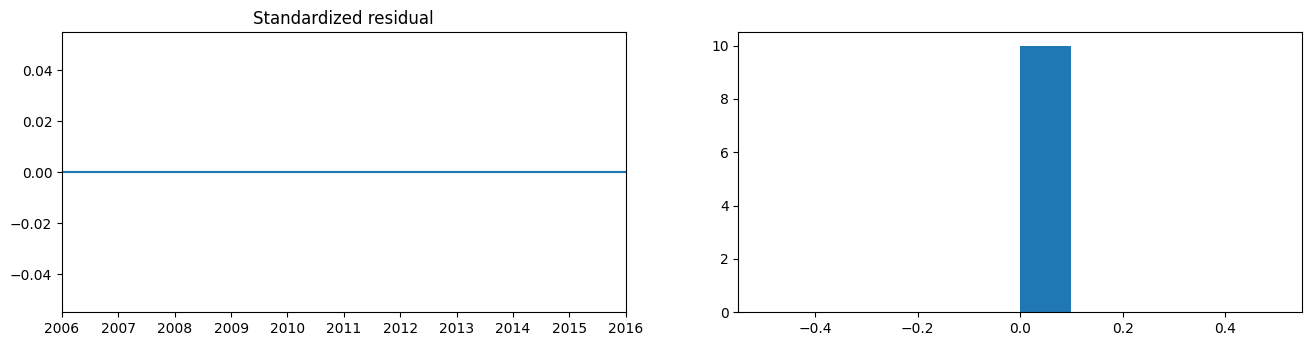

In [146]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

In [148]:
pred = model.predict(n_periods=).to_list()
test_pred = pd.DataFrame({'test':test, 'pred':pred}, index=test.index)
test_pred

ValueError: Input contains NaN.

In [ ]:
test

year
2017-01-01    113.1
2018-01-01    114.7
2019-01-01    115.2
2020-01-01    115.8
2021-01-01    118.7
Name: 대한민국, dtype: float64